In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
# warnings.filterwarnings("ignore", category=UserWarning, module='pandas')

# 유틸 함수 import
from util import pre_time

# 데이터 로드
data = pd.read_csv('./data/직항_머신러닝.csv')
# 일본 데이터 추출
df = data.loc[data['partition_0']=='Japan']
# 시간 전처리
df = pre_time(df)

In [2]:
## agent 별 공항 분포

# print(df['partition_1'].value_counts())
# airport_list = df['partition_1'].unique().tolist()
# agent_partition_data = df[['agentcode','partition_1','partition_0']].groupby('agentcode').value_counts().reset_index()

# unique_partitions = df['partition_1'].unique()
# palette = sns.color_palette(palette='bright',n_colors= len(unique_partitions))
# color_mapping = dict(zip(unique_partitions, palette))


# for agent in df['agentcode'].unique():

#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='partition_1', y='count',
#                 data=agent_partition_data.loc[agent_partition_data['agentcode']==agent],
#                 palette=color_mapping)
    
#     plt.xlabel('출발 시간 (분 단위)')
#     plt.ylabel('항공편 수')
#     plt.title(f'{agent} \n agent 별 공항 분포')
#     plt.xticks(rotation=90, size=8)
#     plt.tight_layout()

#     # 그래프 보여주기
#     plt.show()

In [3]:
# for partition in df['partition_1'].unique():
#     subset = df[df['partition_1'] == partition]
#     plt.figure(figsize=(14, 7))
#     sns.boxplot(x='dep_time', y='total_fare', hue='dep_week', data=subset)
#     plt.title(f'Total Fare Distribution for Partition {partition}')
#     plt.xlabel('Departure Time')
#     plt.ylabel('Total Fare')
#     plt.xticks(rotation=45)
#     plt.show()


In [15]:
sorted(combined_data['dep_time'].unique())

[500, 555, 605, 615, 740, 755, 775, 795]

In [12]:
cheap_ticket_ratios

,dep_time,cheap_ticket_ratio
0,500,17.8
1,555,7.5
2,605,3.5
3,615,23.9
4,740,36.6
5,755,8.6
6,775,22.6
7,795,32.1


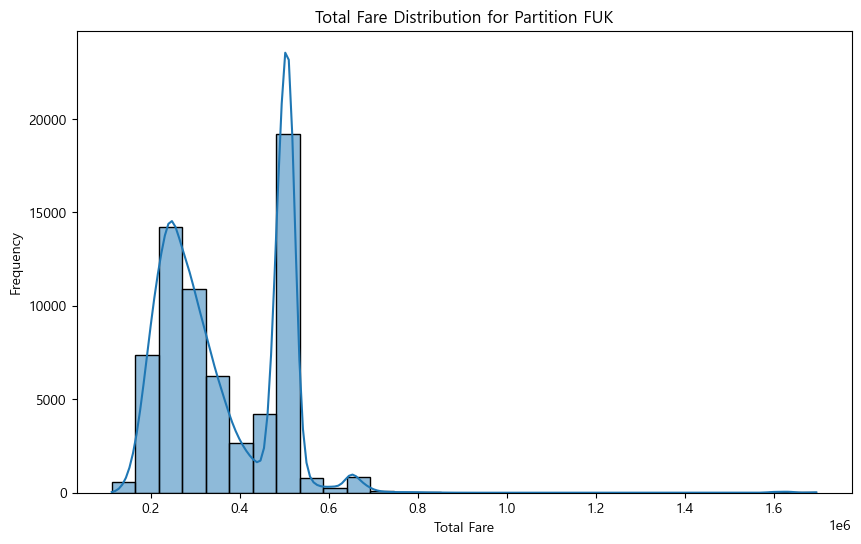

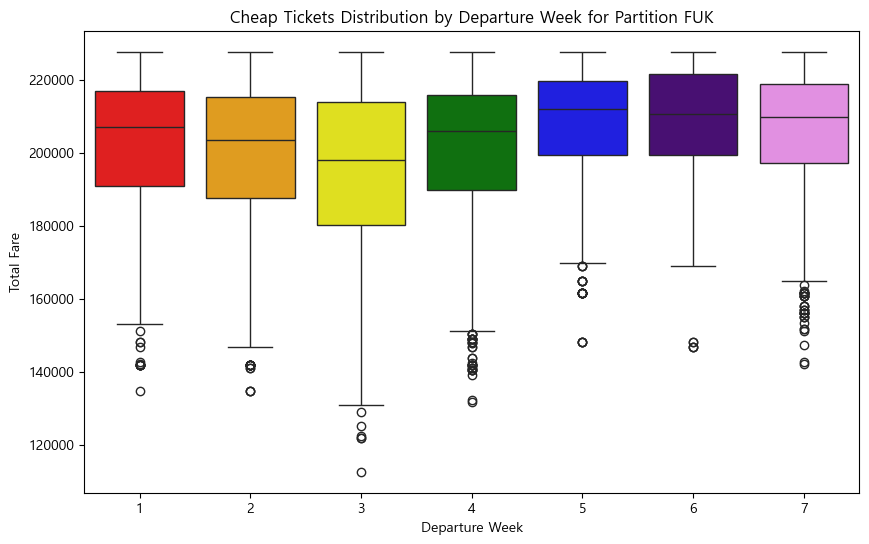

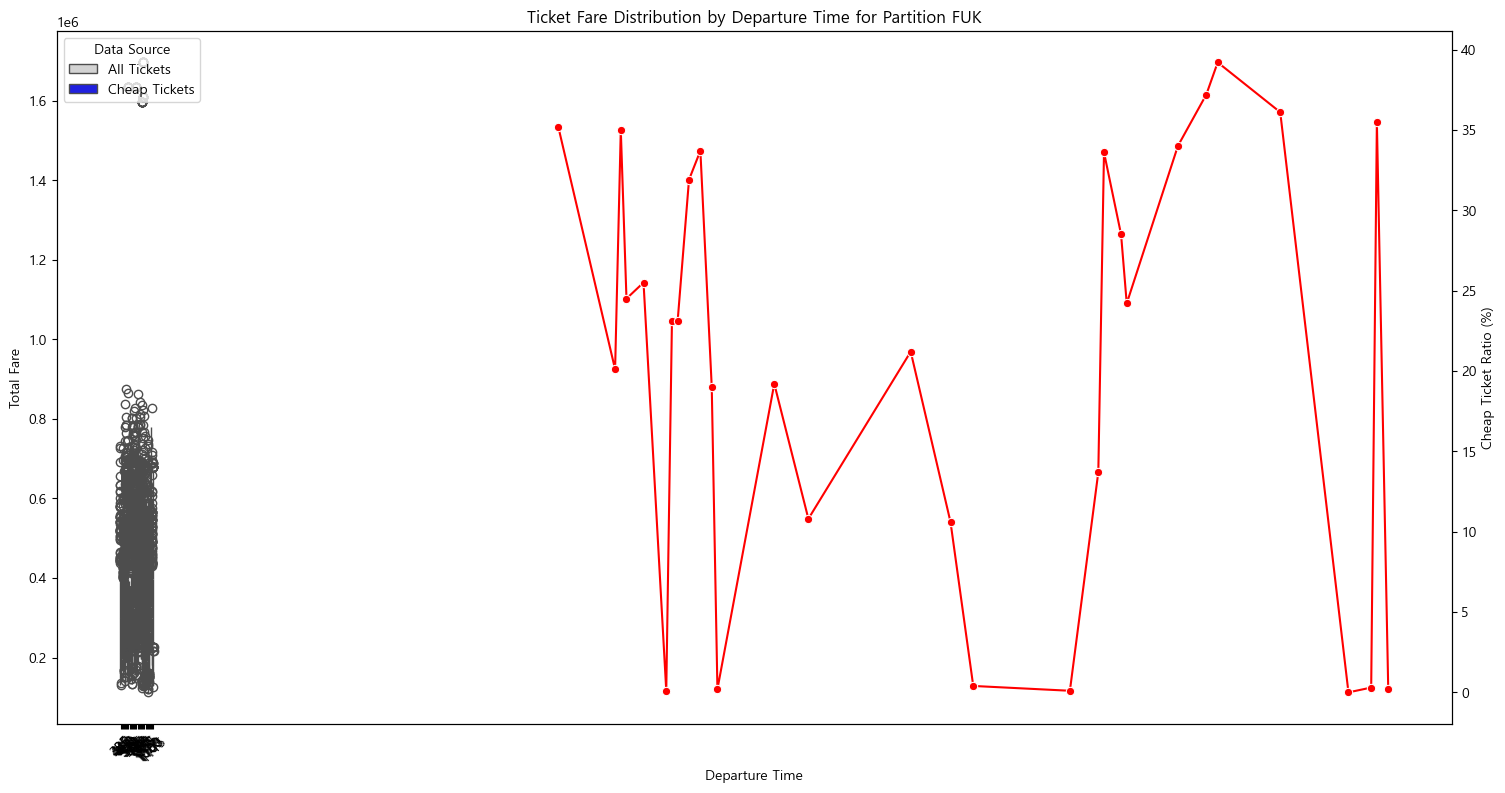

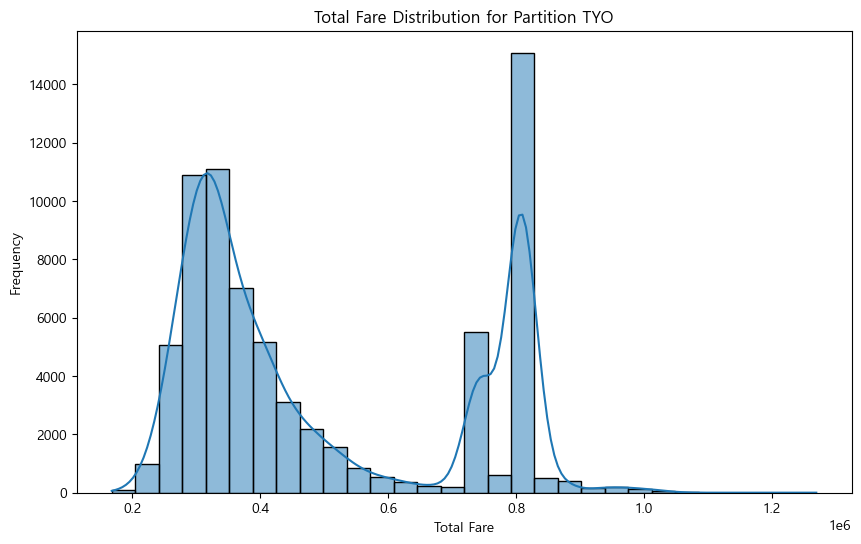

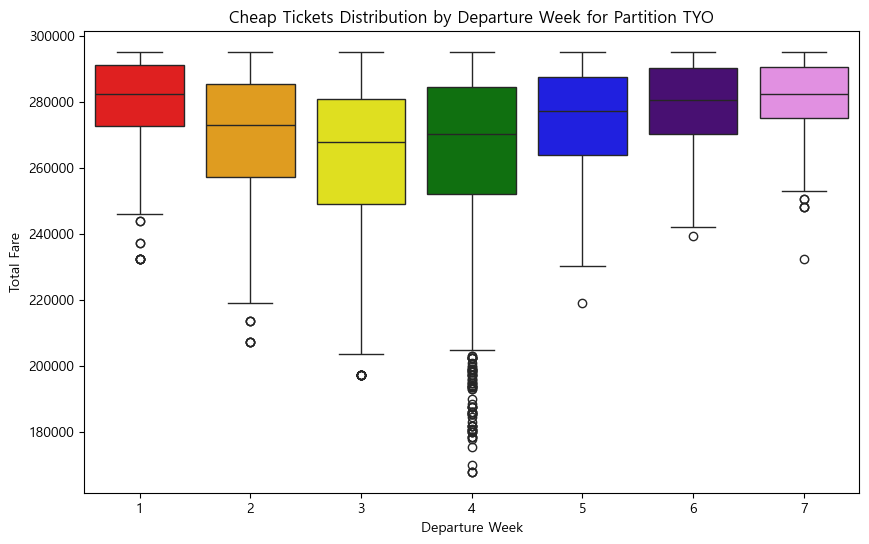

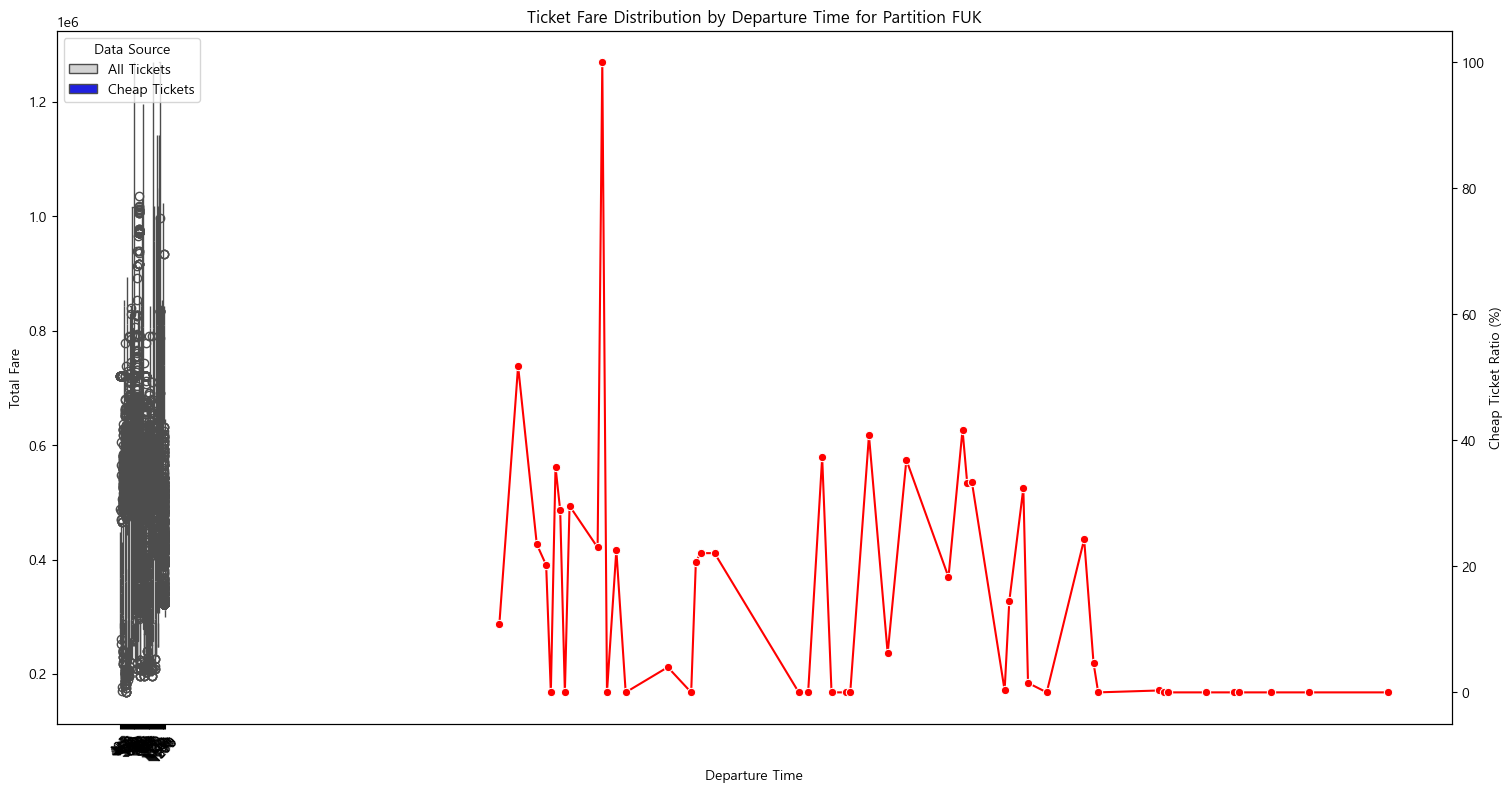

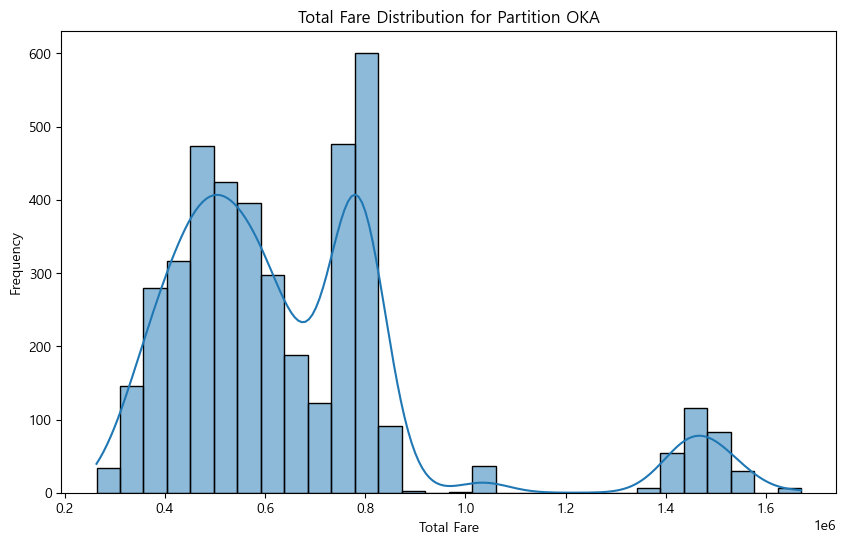

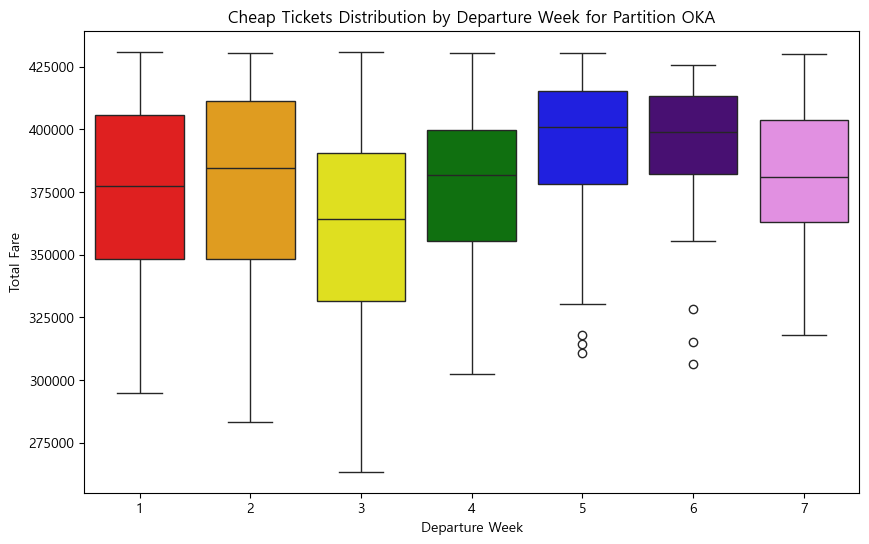

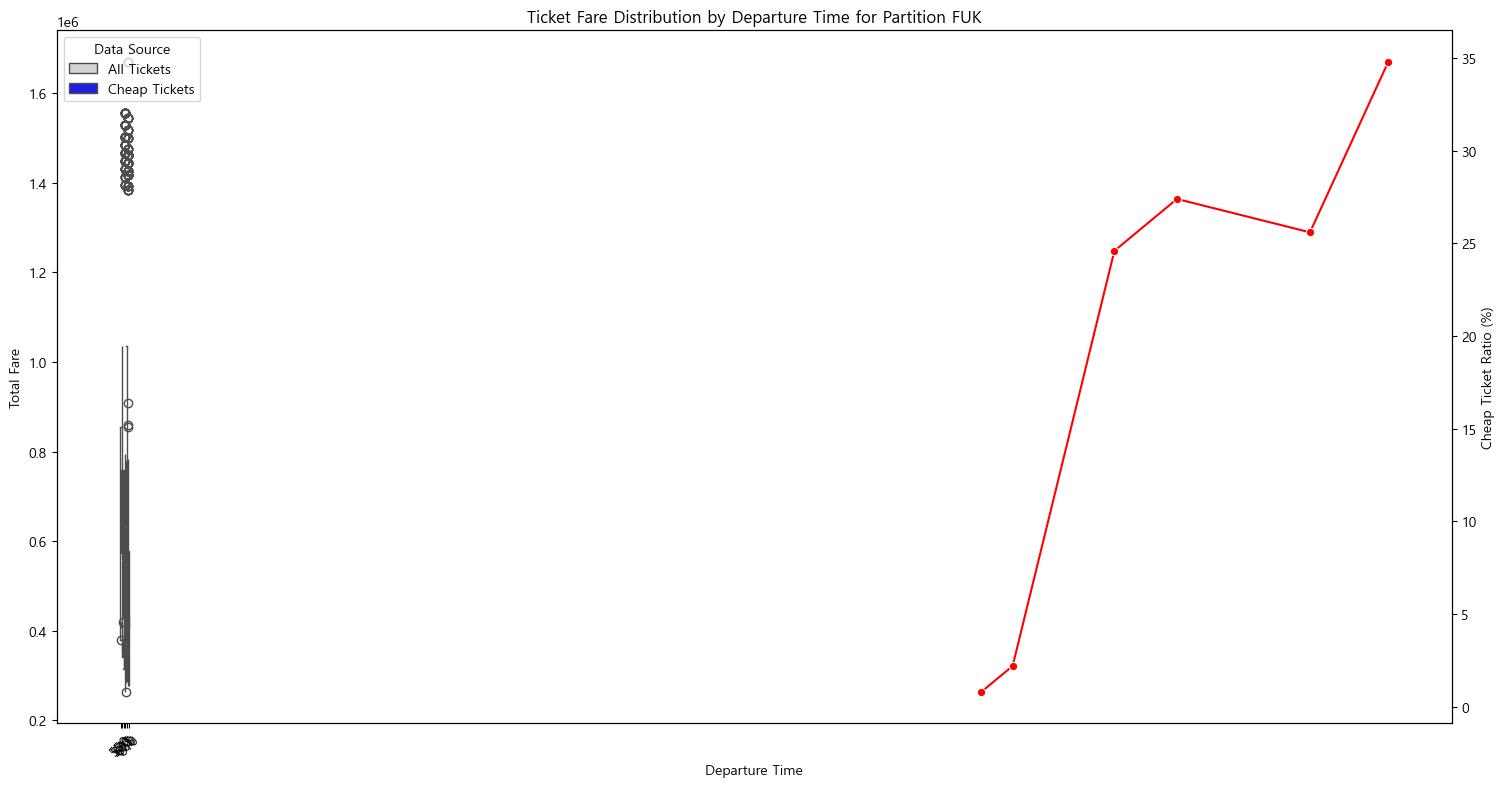

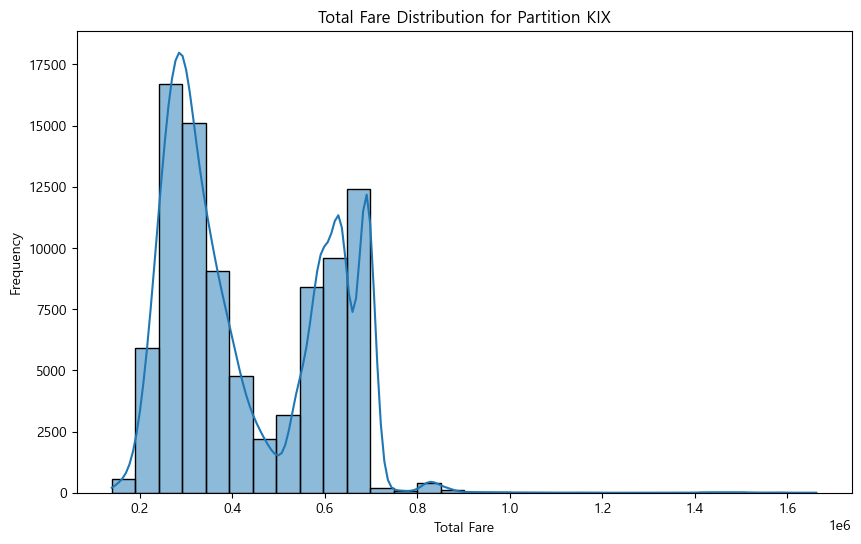

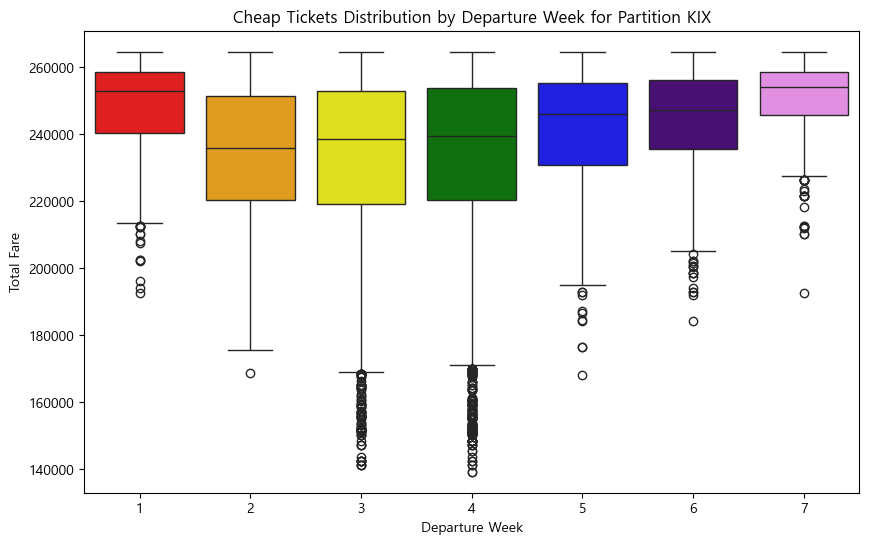

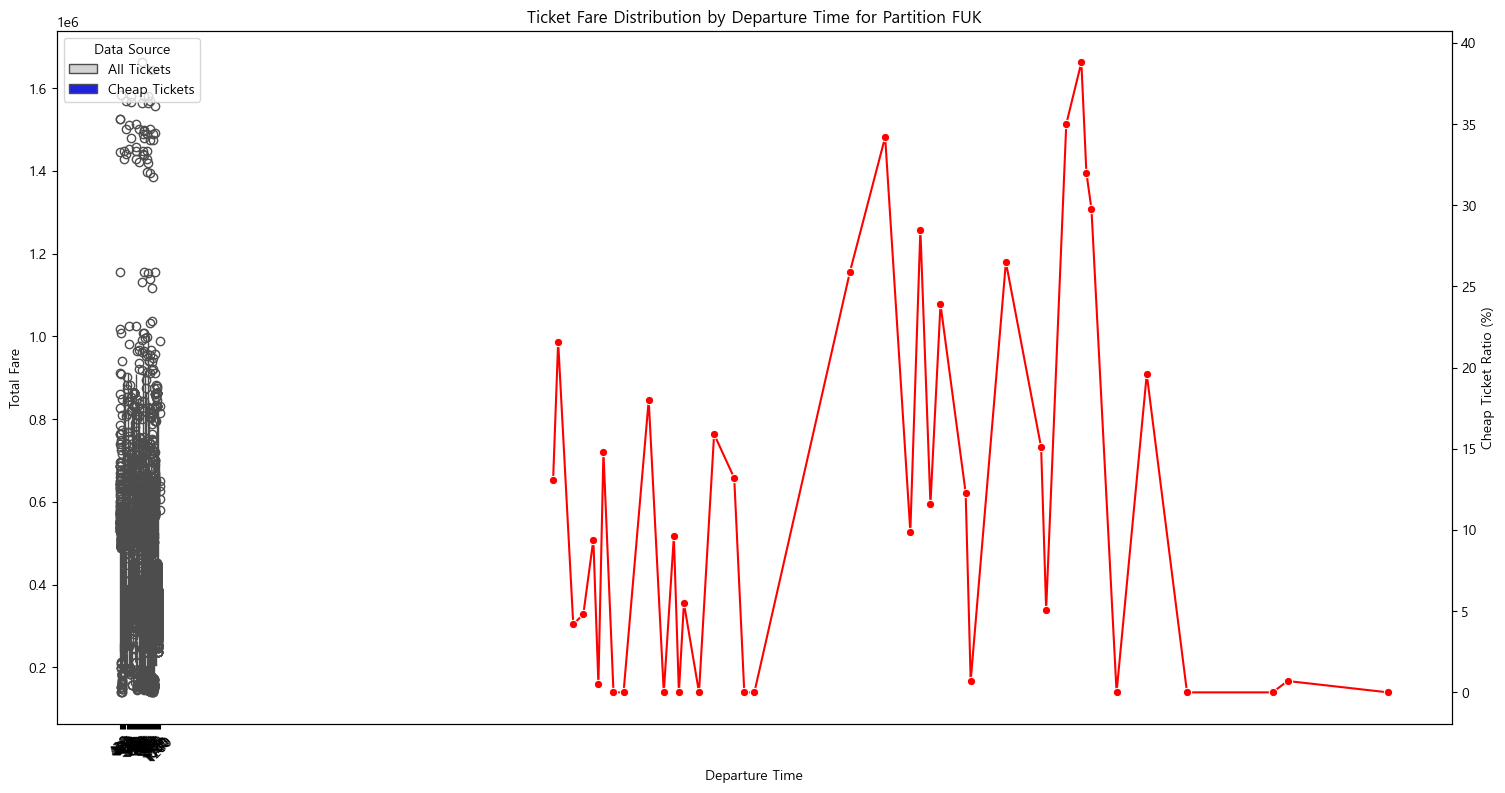

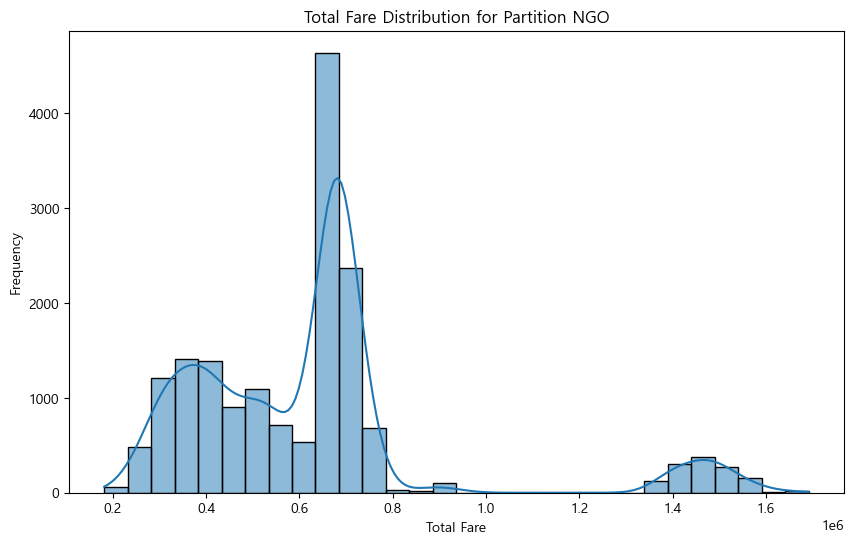

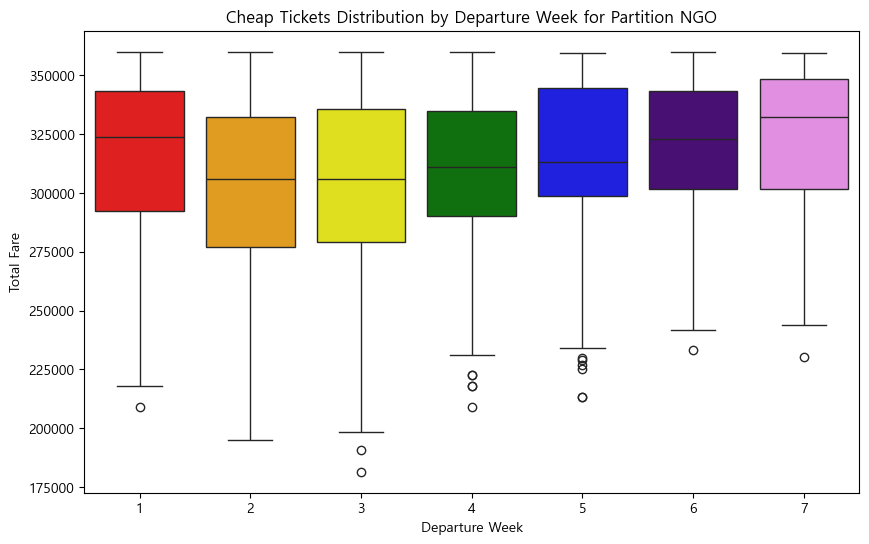

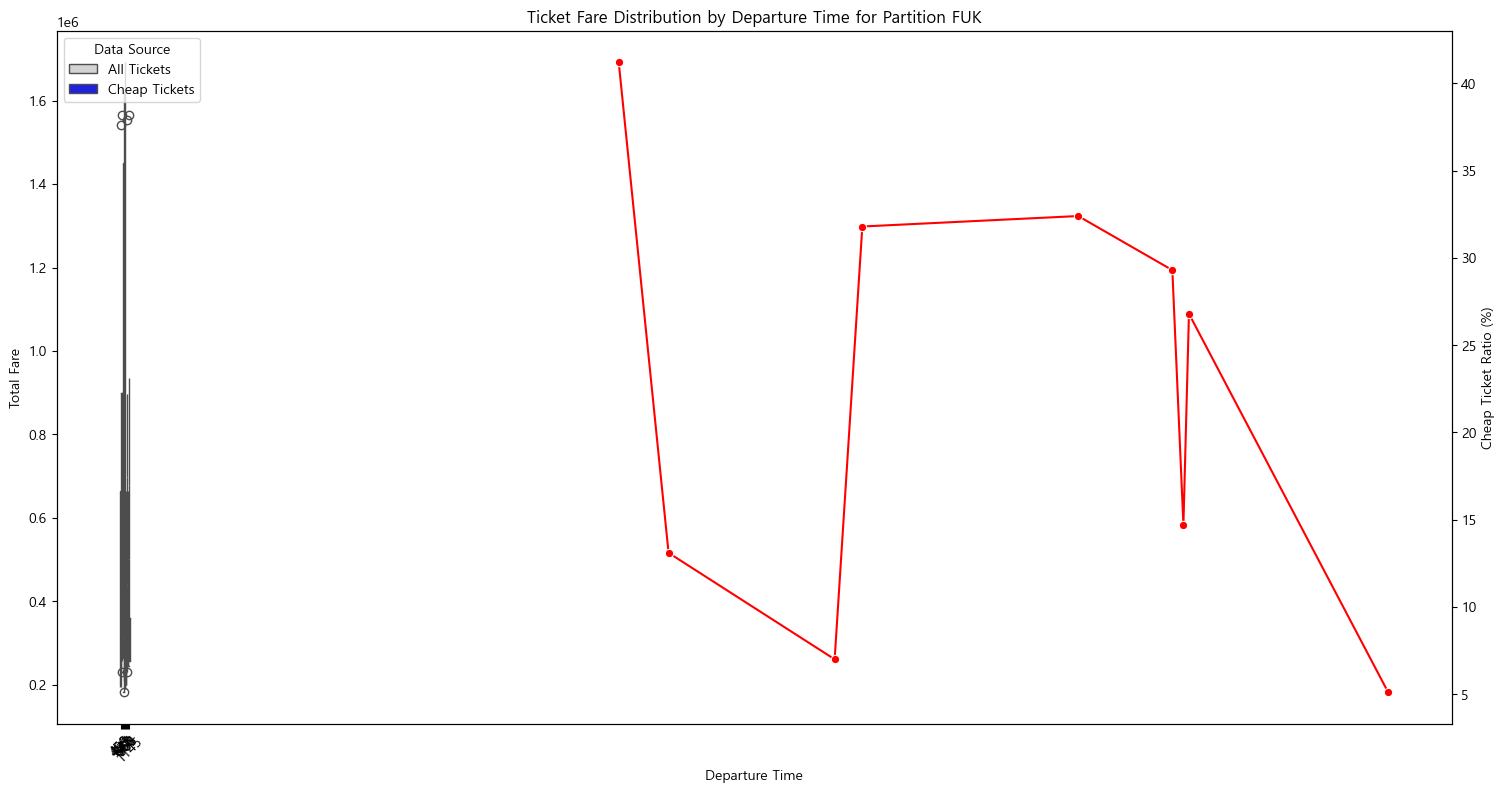

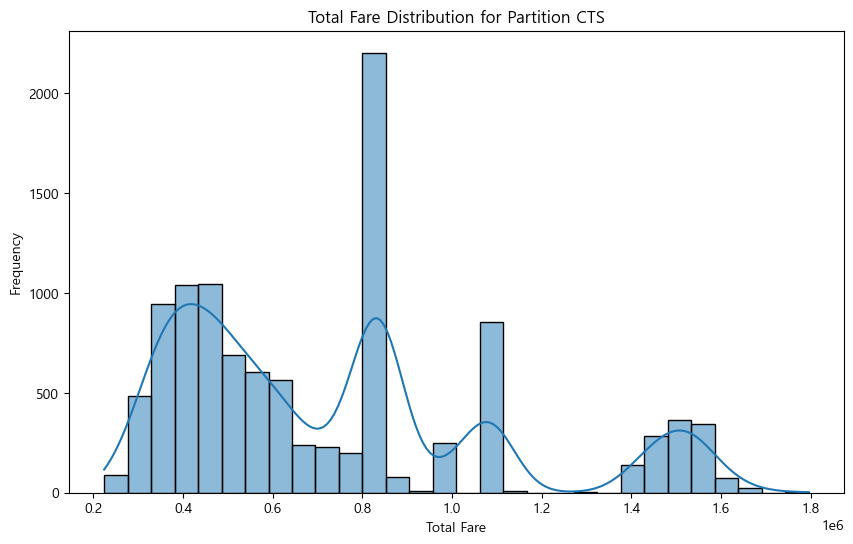

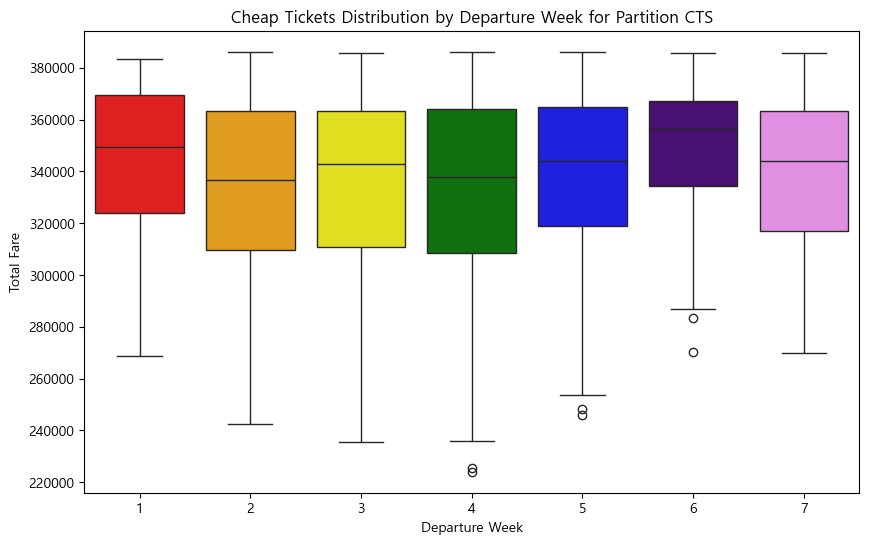

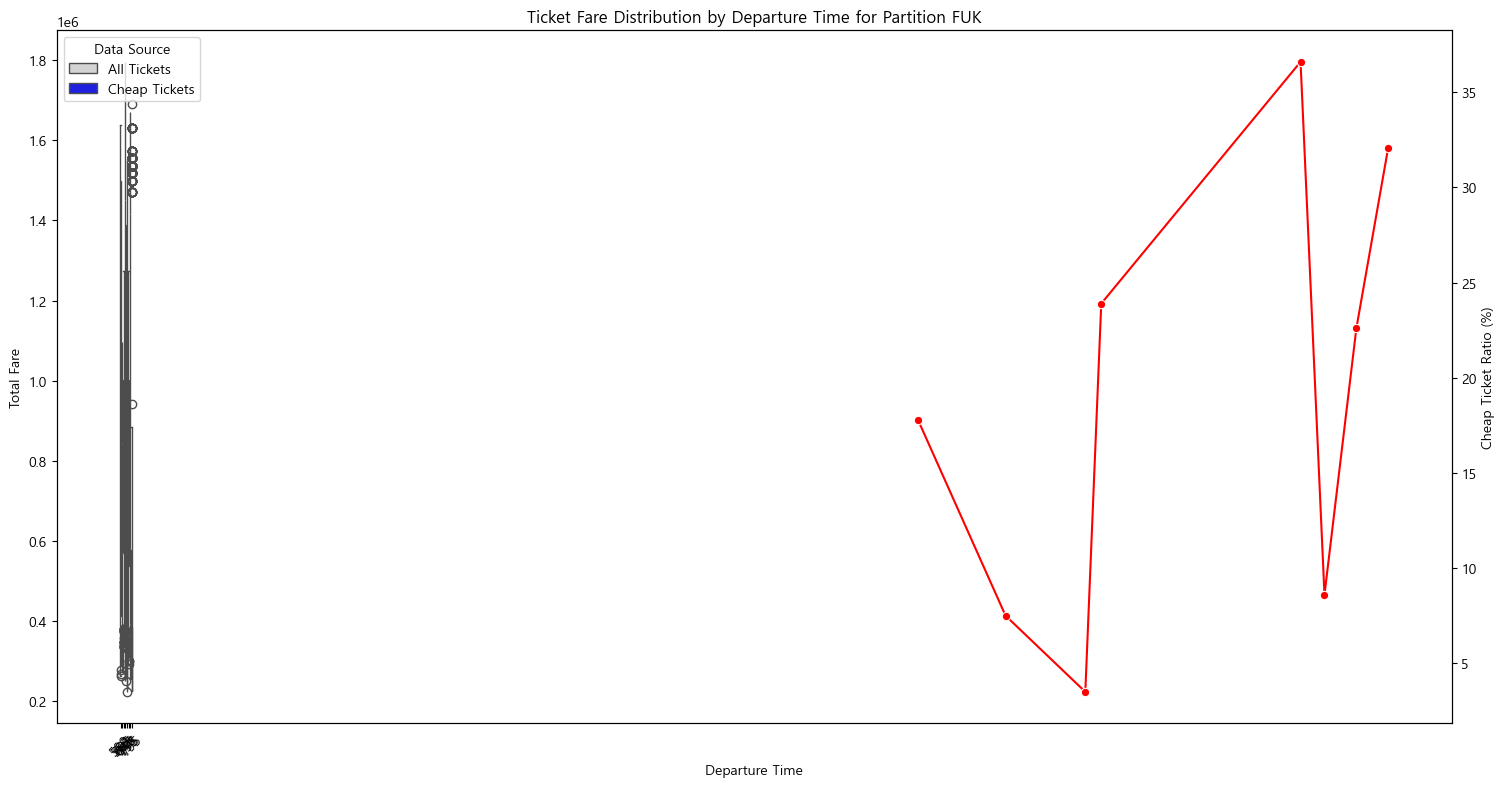

In [30]:
# 색상 팔레트 정의 (빨주노초파남보)
palette = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

for partition in df['partition_1'].unique():
    subset = df[df['partition_1'] == partition]

    # 전체 요금 분포를 히스토그램으로 시각화
    plt.figure(figsize=(10, 6))
    sns.histplot(subset['total_fare'], bins=30, kde=True)
    plt.title(f'Total Fare Distribution for Partition {partition}')
    plt.xlabel('Total Fare')
    plt.ylabel('Frequency')
    plt.show()

    # 저렴한 항공권 데이터 필터링
    threshold = subset['total_fare'].quantile(0.15)
    cheap_tickets = subset[subset['total_fare'] <= threshold]

    # 저렴한 항공권의 출발 요일 분포
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='dep_week', y='total_fare', data=cheap_tickets, palette=palette)
    plt.title(f'Cheap Tickets Distribution by Departure Week for Partition {partition}')
    plt.xlabel('Departure Week')
    plt.ylabel('Total Fare')
    plt.show()
    
    
    # Assuming subset and cheap_tickets are already defined DataFrames

    # Combine data
    subset['data_source'] = 'All Tickets'
    cheap_tickets['data_source'] = 'Cheap Tickets'
    combined_data = pd.concat([subset, cheap_tickets])

    # Calculate cheap ticket ratios
    cheap_ticket_ratios = combined_data.groupby('dep_time').apply(
        lambda x: round((x.loc[x['data_source'] == 'Cheap Tickets'].shape[0] / x.loc[x['data_source'] == 'All Tickets'].shape[0]) * 100, 1)
    ).reset_index(name='cheap_ticket_ratio')

    plt.figure(figsize=(18, 9))

    # Plot the boxplot
    ax = sns.boxplot(x='dep_time', y='total_fare', hue='data_source', data=combined_data, palette=['lightgrey', 'blue'])

    # Create a second y-axis for the line plot
    ax2 = ax.twinx()
    ax2.patch.set_visible(False)  # Make the background transparent

    # Plot the lineplot on the second y-axis
    sns.lineplot(x='dep_time', y='cheap_ticket_ratio', data=cheap_ticket_ratios, marker='o', sort=False, ax=ax2, color='red')

    plt.title(f'Ticket Fare Distribution by Departure Time for Partition FUK')
    ax.set_xlabel('Departure Time')
    ax.set_ylabel('Total Fare')
    ax2.set_ylabel('Cheap Ticket Ratio (%)')

    # Set x-ticks and labels
    # 아래 두 줄이 수정된 부분입니다. x축 눈금을 일치시키고 회전시키는 부분을 추가했습니다.
    dep_times = cheap_ticket_ratios['dep_time'].unique()
    ax.set_xticks(range(len(dep_times)))
    ax.set_xticklabels(dep_times, rotation=45)
    ax2.set_xticks(range(len(dep_times)))
    ax2.set_xticklabels(dep_times, rotation=45)

    # Set legend location to avoid overlap
    ax.legend(title='Data Source', loc='upper left')  # 이 줄도 수정되었습니다. 범례 위치를 왼쪽 위로 설정했습니다.
    plt.show()
    
    # # 피벗 테이블로 요일별 평균 요금 계산 및 히트맵 시각화
    # pivot_table = subset.pivot_table(values='total_fare', index='dep_week', columns='dep_time', aggfunc='mean')
    # plt.figure(figsize=(14, 7))
    # sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='Reds', cbar_kws={'label': 'Total Fare'})
    # plt.title(f'Pivot Table Heatmap for Partition {partition}')
    # plt.xlabel('Departure Time')
    # plt.ylabel('Departure Week')
    
    # # 히트맵의 value 값을 90도 회전
    # for text in plt.gca().texts:
    #     text.set_rotation(90)
        
    # plt.show()

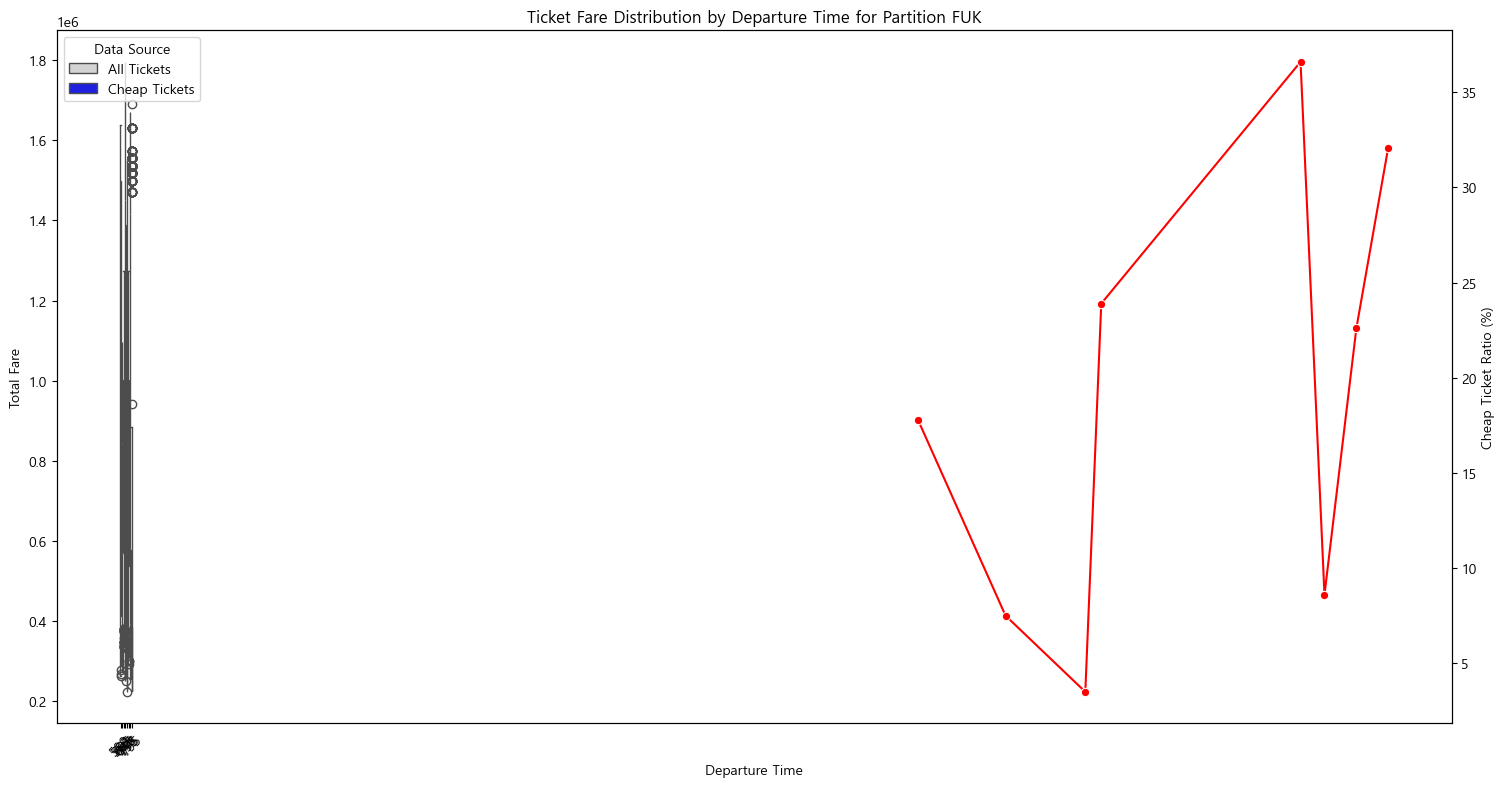

In [31]:
    
    # Assuming subset and cheap_tickets are already defined DataFrames

    # Combine data
    subset['data_source'] = 'All Tickets'
    cheap_tickets['data_source'] = 'Cheap Tickets'
    combined_data = pd.concat([subset, cheap_tickets])

    # Calculate cheap ticket ratios
    cheap_ticket_ratios = combined_data.groupby('dep_time').apply(
        lambda x: round((x.loc[x['data_source'] == 'Cheap Tickets'].shape[0] / x.loc[x['data_source'] == 'All Tickets'].shape[0]) * 100, 1)
    ).reset_index(name='cheap_ticket_ratio')

    plt.figure(figsize=(18, 9))

    # Plot the boxplot
    ax = sns.boxplot(x='dep_time', y='total_fare', hue='data_source', data=combined_data, palette=['lightgrey', 'blue'])

    # Create a second y-axis for the line plot
    ax2 = ax.twinx()
    ax2.patch.set_visible(False)  # Make the background transparent

    # Plot the lineplot on the second y-axis
    sns.lineplot(x='dep_time', y='cheap_ticket_ratio', data=cheap_ticket_ratios, marker='o', sort=False, ax=ax2, color='red')

    plt.title(f'Ticket Fare Distribution by Departure Time for Partition FUK')
    ax.set_xlabel('Departure Time')
    ax.set_ylabel('Total Fare')
    ax2.set_ylabel('Cheap Ticket Ratio (%)')

    # Set x-ticks and labels
    # 아래 두 줄이 수정된 부분입니다. x축 눈금을 일치시키고 회전시키는 부분을 추가했습니다.
    dep_times = cheap_ticket_ratios['dep_time'].unique()
    ax.set_xticks(range(len(dep_times)))
    ax.set_xticklabels(dep_times, rotation=45)
    ax2.set_xticks(range(len(dep_times)))
    ax2.set_xticklabels(dep_times, rotation=45)

    # Set legend location to avoid overlap
    ax.legend(title='Data Source', loc='upper left')  # 이 줄도 수정되었습니다. 범례 위치를 왼쪽 위로 설정했습니다.
    plt.show()